BOA app review data analysis

In [29]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob

In [2]:

# Configure your database connection
db_host = 'localhost'
db_port = '5432'
db_name = 'tickvah_banks_ads'
db_user = 'postgres'
db_password = 'ocho'

# Create the database URL
db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Load the CSV file into a DataFrame
app_filepath = '../data/playstore_reviews.csv'
reviews_df = pd.read_csv(app_filepath)

# Write the DataFrame to a new table in the PostgreSQL database
reviews_df.to_sql('playstore_reviews_info', engine, if_exists='replace', index=False)

print("Data saved successfully.")

Data saved successfully.


In [3]:
# Function to load data from the database
def load_data(engine):
    
    reviews_df = pd.read_sql('SELECT * FROM playstore_reviews_info', engine)
    return  reviews_df

In [9]:
reviews_df['at'] = pd.to_datetime(reviews_df['at'])

In [10]:
# Function for data summarization and quality assessment
def data_summary(reviews_df):
    print("Ads Data Summary:")
    print(reviews_df.describe())
  

In [11]:
data_summary(reviews_df)

Ads Data Summary:
                👍                             at  replyContent  repliedAt  \
count  199.000000                            199           0.0        0.0   
mean     3.115578  2024-05-07 17:36:43.834170880           NaN        NaN   
min      0.000000            2024-04-30 08:17:07           NaN        NaN   
25%      0.000000     2024-05-02 12:34:01.500000           NaN        NaN   
50%      0.000000            2024-05-04 22:43:38           NaN        NaN   
75%      1.000000            2024-05-11 16:03:25           NaN        NaN   
max    281.000000            2024-05-24 20:38:48           NaN        NaN   
std     22.127539                            NaN           NaN        NaN   

            score  Keywords  LDA_Category  Sentiment  Insight  installs  
count  199.000000       0.0           0.0        0.0      0.0     199.0  
mean     2.537688       NaN           NaN        NaN      NaN  100000.0  
min      1.000000       NaN           NaN        NaN      NaN  100

In [12]:
def data_show(reviews_df):
    print(reviews_df.head)

In [13]:
reviews_df.head(10)

,reviewId,userName,userImage,👍,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,Comments,Keywords,LDA_Category,Sentiment,Insight,installs,date,version
0,cdba46f4-4ab0-43ec-8d9a-e695cd895794,Girum Ab,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-24 20:38:48,NaN,NaN,24.05.07,1,Sorry to say this compared to other banks mobi...,NaN,NaN,NaN,NaN,100000,2024-05-24,24.05.07
1,fc1187a6-16d9-43c7-91a7-7c25d5f6080c,Ayenew Chekole,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-24 18:17:38,NaN,NaN,24.05.07,5,Good,NaN,NaN,NaN,NaN,100000,2024-05-24,24.05.07
2,1c7fe538-d19f-40ac-9b8b-3e3458f8a26e,Ibsaa Carcar,https://play-lh.googleusercontent.com/a-/ALV-U...,0,NaN,2024-05-23 23:37:43,NaN,NaN,NaN,5,Very Very nice 👌 👍,NaN,NaN,NaN,NaN,100000,2024-05-23,24.05.07
3,58ccb5e9-0cf7-413c-8bb4-6515d4863bc1,Amenti Tesgera,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.05.07,2024-05-23 14:39:10,NaN,NaN,24.05.07,5,🥰🥰🥰🥰🥰,NaN,NaN,NaN,NaN,100000,2024-05-23,24.05.07
4,f77c9ee3-07b7-4203-9aaa-f019d35abaa6,Chernet Bekele,https://play-lh.googleusercontent.com/a/ACg8oc...,1,NaN,2024-05-22 17:02:36,NaN,NaN,NaN,4,Cool,NaN,NaN,NaN,NaN,100000,2024-05-22,24.05.07
5,622762e8-14b9-42eb-b807-8960278d8b34,Hermon Z,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-22 10:03:55,NaN,NaN,24.05.07,3,What is that disable developer option I have n...,NaN,NaN,NaN,NaN,100000,2024-05-22,24.05.07
6,9756a397-2464-40d6-8eab-d269c119aa9e,Davinci Tube,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-22 05:01:58,NaN,NaN,24.05.07,1,Please fix the app i doesn't belongs to Abbssi...,NaN,NaN,NaN,NaN,100000,2024-05-22,24.05.07
7,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 23:38:28,NaN,NaN,24.05.07,5,All,NaN,NaN,NaN,NaN,100000,2024-05-21,24.05.07
8,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 20:53:34,NaN,NaN,24.05.07,1,Very poor,NaN,NaN,NaN,NaN,100000,2024-05-21,24.05.07
9,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,0,NaN,2024-05-21 16:55:00,NaN,NaN,NaN,5,Excellent,NaN,NaN,NaN,NaN,100000,2024-05-21,24.05.07


In [33]:
# Function for additional creative visualizations
def additional_visualizations( reviews_df):
    

    plt.figure(figsize=(10, 6))
    sns.histplot(reviews_df['score'], bins=5, kde=True)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reviews_df, x='score', y='appVersion')
    plt.title('Review Score vs. app_version')
    plt.xlabel('Score')
    plt.ylabel('app_version')
    plt.show()

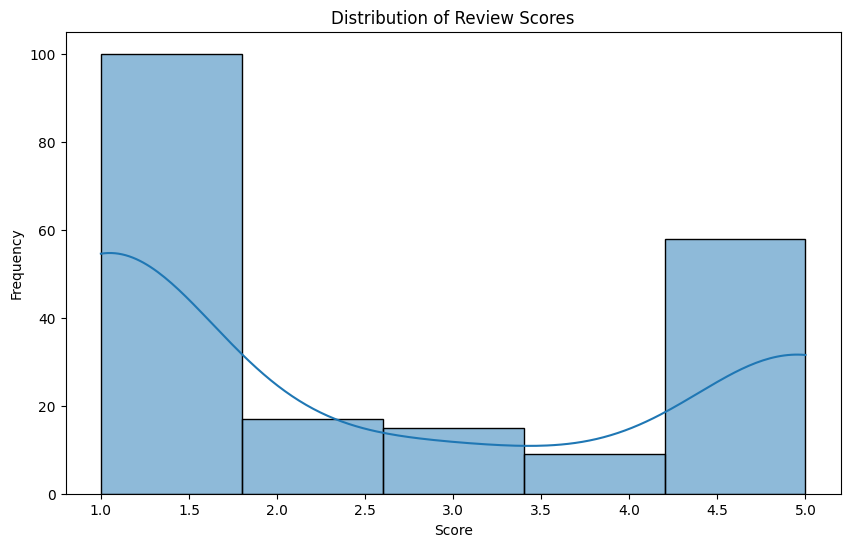

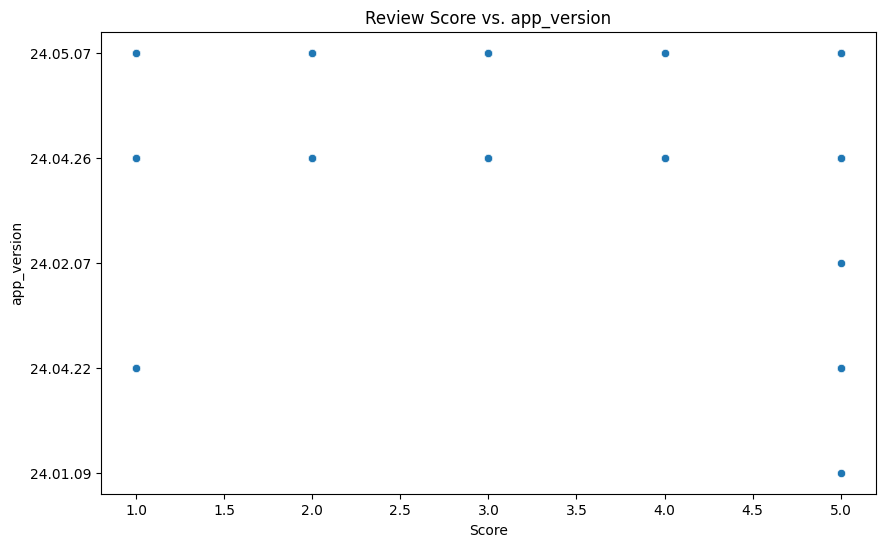

In [34]:
additional_visualizations( reviews_df)

In [18]:
# Function for additional creative visualizations
def visualizations( reviews_df):
    

    plt.figure(figsize=(10, 6))
    sns.histplot(reviews_df['👍'], bins=5, kde=True)
    plt.title('Distribution of Review likes')
    plt.xlabel('👍')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=reviews_df, x='installs', y='appVersion')
    plt.title('Review installs vs. app_version')
    plt.xlabel('installs')
    plt.ylabel('app_version')
    plt.show()

C:\Users\akili\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


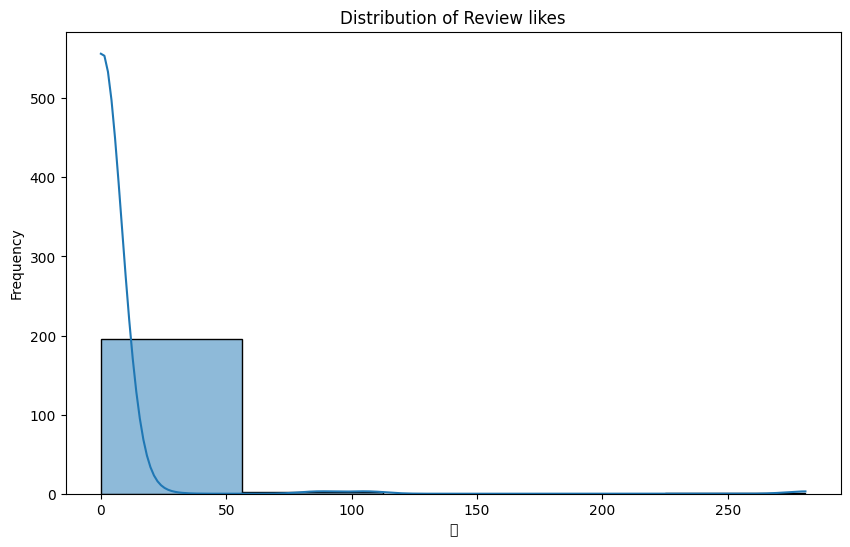

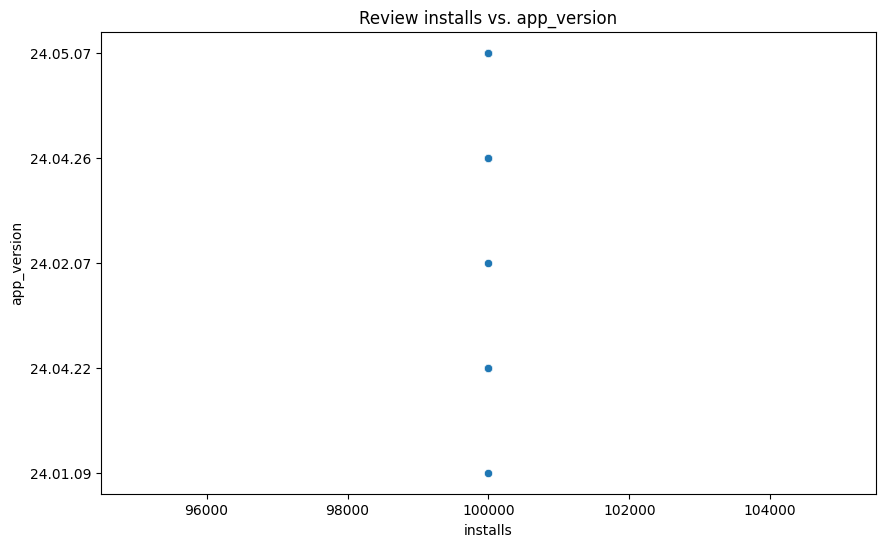

In [19]:
visualizations( reviews_df)

In [40]:
# Function to perform sentiment analysis using TextBlob
def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Load your dataset
reviews_df['Sentiment'] = reviews_df['Sentiment'].apply(get_sentiment)

# Save or display the updated dataset
reviews_df.to_sql('playstore_reviews_info', engine, if_exists='replace', index=False)  # Update with your actual save path
print(reviews_df.head())

# Apply the get_sentiment function to the 'sentiment' column


In [42]:
# Update with your actual save path
print(reviews_df.head())

                               reviewId        userName  \
0  cdba46f4-4ab0-43ec-8d9a-e695cd895794        Girum Ab   
1  fc1187a6-16d9-43c7-91a7-7c25d5f6080c  Ayenew Chekole   
2  1c7fe538-d19f-40ac-9b8b-3e3458f8a26e    Ibsaa Carcar   
3  58ccb5e9-0cf7-413c-8bb4-6515d4863bc1  Amenti Tesgera   
4  f77c9ee3-07b7-4203-9aaa-f019d35abaa6  Chernet Bekele   

                                           userImage  👍 reviewCreatedVersion  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...  0             24.05.07   
1  https://play-lh.googleusercontent.com/a-/ALV-U...  0             24.05.07   
2  https://play-lh.googleusercontent.com/a-/ALV-U...  0                  NaN   
3  https://play-lh.googleusercontent.com/a/ACg8oc...  0             24.05.07   
4  https://play-lh.googleusercontent.com/a/ACg8oc...  1                  NaN   

                   at  replyContent  repliedAt appVersion  score  \
0 2024-05-24 20:38:48           NaN        NaN   24.05.07      1   
1 2024-05-24 18:17:38       

In [56]:
def date_analysis(reviews_df):
 # Ensure the 'date' column is in datetime format
 reviews_df['date'] = pd.to_datetime(reviews_df['date']) 
 
 reviews_df['Month'] = reviews_df['date'].dt.month
 reviews_df['Year'] = reviews_df['date'].dt.year
 print(reviews_df.head())
 
date_analysis(reviews_df)

                               reviewId        userName  \
0  cdba46f4-4ab0-43ec-8d9a-e695cd895794        Girum Ab   
1  fc1187a6-16d9-43c7-91a7-7c25d5f6080c  Ayenew Chekole   
2  1c7fe538-d19f-40ac-9b8b-3e3458f8a26e    Ibsaa Carcar   
3  58ccb5e9-0cf7-413c-8bb4-6515d4863bc1  Amenti Tesgera   
4  f77c9ee3-07b7-4203-9aaa-f019d35abaa6  Chernet Bekele   

                                           userImage  👍 reviewCreatedVersion  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...  0             24.05.07   
1  https://play-lh.googleusercontent.com/a-/ALV-U...  0             24.05.07   
2  https://play-lh.googleusercontent.com/a-/ALV-U...  0                  NaN   
3  https://play-lh.googleusercontent.com/a/ACg8oc...  0             24.05.07   
4  https://play-lh.googleusercontent.com/a/ACg8oc...  1                  NaN   

                   at  replyContent  repliedAt appVersion  score  \
0 2024-05-24 20:38:48           NaN        NaN   24.05.07      1   
1 2024-05-24 18:17:38       

In [66]:
# Plot sentiment over time


def plot_sentiment_over_time(reviews_df):
    # Create a pivot table to count the occurrences of each sentiment per date
    sentiment_counts = reviews_df.pivot_table(index='date', columns='Sentiment', aggfunc='size', fill_value=0)
    
    # Ensure that all expected sentiment columns exist in the DataFrame
    for sentiment in ['positive', 'negative', 'neutral']:
        if sentiment not in sentiment_counts.columns:
            sentiment_counts[sentiment] = 0
    
    # Reset the index to make 'date' a column
    sentiment_counts = sentiment_counts.reset_index()

    # Plot the sentiment counts over time
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=sentiment_counts, x='date', y='positive', label='Positive Sentiment')
    sns.lineplot(data=sentiment_counts, x='date', y='negative', label='Negative Sentiment')
    sns.lineplot(data=sentiment_counts, x='date', y='neutral', label='Neutral Sentiment')
    plt.title('Daily Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Count')
    plt.legend()
    plt.show()



# Plot sentiment over time



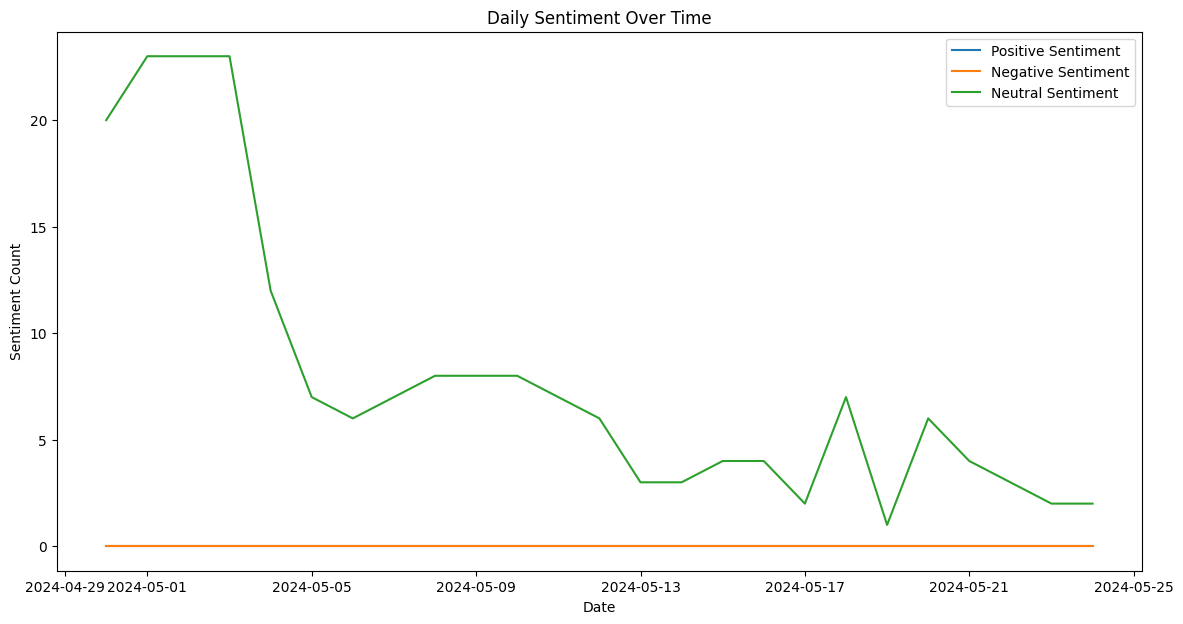

In [67]:
plot_sentiment_over_time( reviews_df)